In [3]:
"""
    author: Suhas Vittal
    date:   7 March 2024
"""

surface_codes = [
    'hysc/3_8/48_6_6_3',
    'hysc/3_8/96_10_10_4',
    'hysc/3_8/504_44_14_6',
    'hysc/4_6/36_8_4_4',
    'hysc/4_6/336_58_8_6',
    'hysc/4_6/864_146_10_8',
#    'hysc/5_5/30_8_3_3',
#    'hysc/5_5/80_18_5_5',
#    'hysc/5_5/150_32_6_6',
#    'hysc/5_5/900_182_8_8'
]

color_codes = [
#    'hycc/3_8/48_8_4_4',
    'hycc/4_6/24_8_4_4',
    'hycc/4_6/96_20_6_6',
    'hycc/4_6/192_36_8_8',
#    'hycc/4_6/1536_260_12_12',
    'hycc/4_10/40_16_4_4',
#    'hycc/4_10/480_148_6_6',
#    'hycc/4_10/640_196_8_8'
]

all_codes = [*surface_codes, *color_codes]

# Color palette:
c1 = '#7D0A0A'
c2 = '#BF3131'
c3 = '#EAD196'
c4 = '#F3EDC8'
c5 = '#004225'
c6 = '#F5F5DC'
c7 = '#FFB000'
c8 = '#FFCF9D'

In [81]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

from collections import defaultdict

import os

plt.rcParams['pdf.fonttype'] = 42

In [80]:
def split_csv_line(line: str, delim=',') -> list[str]:
    dat = []
    in_quote = False
    curr = []
    for c in line:
        if c == '\"':
            in_quote = not in_quote
        elif c == ',':
            if in_quote:
                curr.append(c)
            else:
                dat.append(''.join(curr))
                curr = []
        else:
            curr.append(c)
    dat.append(''.join(curr))
    return dat

def get_arch_stats(benchmark, version):
    fname = f'../../data/protean/{benchmark}/v{version}/stats.txt'
    with open(fname, 'r') as reader:
        lines = reader.readlines()[1:] # Ignore the first line -- just a header.
    stats = {}
    for line in lines:
        d = line.split(',')
        stats[d[0]] = float(d[1])
    return stats

def code_name(benchmark):
    return benchmark.split('/')[2]

def get_stats_from_code_name(name):
    # Format is n_k_dz_dx
    d = name.split('_')
    return { 'n': int(d[0]), 'k': int(d[1]), 'dz': int(d[2]), 'dx': int(d[3]) }

def format_code_name(name):
    stats = get_stats_from_code_name(name)
    n, k, dz, dx = stats['n'], stats['k'], stats['dz'], stats['dx']
    return '[[%d, %d, %d, %d]]' % (n, k, dz, dx) 

def get_error_rates_from_file(f, ler_key=-1):
    with open(f, 'r') as reader:
        lines = reader.readlines()[1:]
    X, Y = [], []
    for line in lines:
        d = line.split(',')
        if float(d[-1]) > 0:
            X.append(float(d[0]))
            Y.append(float(d[ler_key]))
    X, Y = zip(*sorted(zip(X, Y)))
    return X, Y

def get_rsc_error_rates(d):
    f = f'../../data/protean/rsc/output/d{d}.csv'
    return get_error_rates_from_file(f)

def get_code_error_rates(code, version, ler_key=-1):
    f = f'../../data/protean/{code}/v{version}/output/basic_memory_z.csv'
    return get_error_rates_from_file(f, ler_key=ler_key)


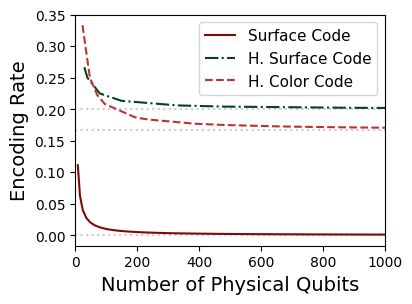

In [79]:
### Introduction Rate Plot:
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)

sc_d = np.arange(3, 33)
sc_n = [d**2 for d in sc_d]
sc_r = [1.0/(d**2) for d in sc_d]

# 5_5 family
hysc_n = [30, 40, 80, 150, 330, 480, 900, 1280]
hysc_r = [8/30, 10/40, 18/80, 32/150, 68/330, 98/480, 182/900, 258/1280]

# 4_6 family
hycc_n = [24, 48, 72, 96, 192, 216, 244, 384, 480, 648, 720, 768, 865, 960, 1152]
hycc_r = [8/24, 12/48, 16/72, 20/96, 36/192, 40/216, 44/240, 68/384, 84/480, 112/648, 124/720, 132/768, 148/864, 164/960, 196/1152]


ax.axhline(y=0.0, linestyle=':', color='#cccccc')
ax.axhline(y=0.2, linestyle=':', color='#cccccc')
ax.axhline(y=1/6, linestyle=':', color='#cccccc')
ax.plot(sc_n, sc_r, '-', color=c1, label='Surface Code')
ax.plot(hysc_n, hysc_r, '-.', color=c5, label='H. Surface Code')
ax.plot(hycc_n, hycc_r, '--', color=c2, label='H. Color Code')

ax.set_xlabel('Number of Physical Qubits', fontsize=14)
ax.set_ylabel('Encoding Rate', fontsize=14)
ax.set_xlim([0, 1000])
ax.legend(fontsize=11)

plt.savefig('plots/intro_rate_cmp.pdf', bbox_inches='tight')

In [ ]:
## Background plot
fig, ax = plt.subplots()
fig.set_size_inches(4, 2.5)

code = 'hysc/4_5/60_8_6_4'
x1, y1 = get_code_error_rates(code, '1', -2)
x2, y2 = get_code_error_rates(code, '2', -2)

ax.plot(x1, y1, '-o', color=c1, ms=10, label='Without Flags')
ax.plot(x2, y2, '--x', color=c5, ms=10, label='With Flags')

ax.set_xlabel('Physical Error Rate', fontsize=14)
ax.set_ylabel('Block Error Rate', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid()
ax.legend(fontsize=11)

plt.savefig('plots/background_ler_flag_cmp.pdf', bbox_inches='tight')

Mean flag overheads for v=3.4: 0.4939694859493792
Mean flag overheads for v=3.4: 0.49078459119002366


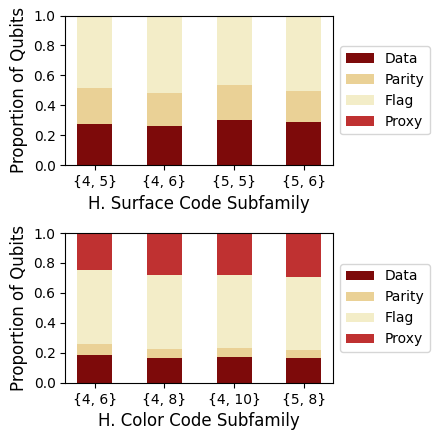

In [224]:
def get_overheads_by_qubit(code, version):
    f = f'../../data/protean/{code}/v{version}/roles.txt'
    with open(f, 'r') as reader:
        lines = reader.readlines()[1:] # First line is header.
    n_data, n_parity, n_flag, n_proxy = 0, 0, 0, 0
    for line in lines:
        dat = split_csv_line(line)
        q, roles = int(dat[0]), dat[2]
        if 'd' in roles:
            n_data += 1
        elif 'x' in roles or 'z' in roles:
            n_parity += 1
        elif 'f' in roles:
            n_flag += 1
        else:
            n_proxy += 1
    tot = n_data + n_parity + n_flag + n_proxy
    n_data /= tot
    n_parity /= tot
    n_flag /= tot
    n_proxy /= tot
    return n_data, n_parity, n_flag, n_proxy

def get_mean_overheads_for_subfamily(family, subfamily, version):
    base_folder = f'../../data/protean/{family}/{subfamily}'
    codes = [f for f in os.listdir(base_folder) if os.path.exists(f'{base_folder}/{f}/v{version}/roles.txt')]
    if len(codes) == 0:
        print(f'No codes for {family}/{subfamily}')
        return 0, 0, 0, 0
    md, mp, mf, mr = 0, 0, 0, 0
    for f in codes:
        nd, np, nf, nr = get_overheads_by_qubit(f'{family}/{subfamily}/{f}', version)
        md += nd
        mp += np
        mf += nf
        mr += nr
    md /= len(codes)
    mp /= len(codes)
    mf /= len(codes)
    mr /= len(codes)
    return md, mp, mf, mr

## Flag Overhead Plot -- no sharing
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(4.5, 4.5)

subf = {'hysc': ['4_5', '4_6', '5_5', '5_6'], 'hycc': ['4_6', '4_8', '4_10', '5_8']}

version = '3.4'
def add_data_to_ax(ax, family, xlabel):
    data = {'Data': [], 'Parity': [], 'Flag': [], 'Proxy': []}
    for sf in subf[family]:
        md, mp, mf, mr = get_mean_overheads_for_subfamily(family, sf, version)
        data['Data'].append(md)
        data['Parity'].append(mp)
        data['Flag'].append(mf)
        data['Proxy'].append(mr)
    base = np.zeros(len(subf[family]))
    for k in data:
        data[k] = np.array(data[k])
    color_dict = {'Data': c1, 'Parity': c3, 'Flag': c4, 'Proxy': c2}
    code_names = []
    for sf in subf[family]:
        r, s = [int(x) for x in sf.split('_')]
        code_names.append('{%d, %d}' % (r, s))
    for (k, v) in data.items():
        ax.bar(code_names, v, 0.5, label=k, bottom=base, color=color_dict[k])
        base += v
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Proportion of Qubits', fontsize=12)
    ax.set_ylim([0.0, 1.0])
    
    print(f'Mean flag overheads for v={version}:', data['Flag'].mean())
add_data_to_ax(ax1, 'hysc', 'H. Surface Code Subfamily')
add_data_to_ax(ax2, 'hycc', 'H. Color Code Subfamily')

ax1.legend(fontsize=10, bbox_to_anchor=(1.0, 0.5), loc='center left')
ax2.legend(fontsize=10, bbox_to_anchor=(1.0, 0.5), loc='center left')

plt.tight_layout()
plt.savefig('plots/overheads_wo_flag_sharing.pdf')

Geomean R_eff for  hysc : 1.1929634214141898 max: 1.2170933812444908


FileNotFoundError: [Errno 2] No such file or directory: '../../data/protean/hycc/5_8/2560_900_8_8/v4.4/stats.txt'

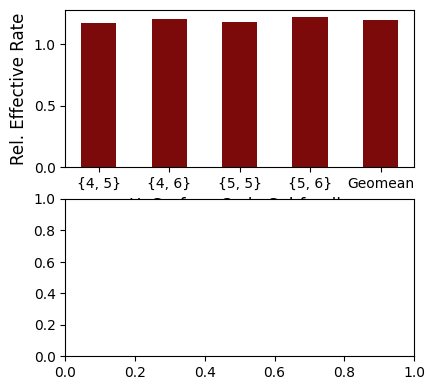

In [225]:
## Mean improvement in effective rate through flag sharing.
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(4.5, 4.5)

def get_relative_effective_rate(family, subfamily):
    base_folder = f'../../data/protean/{family}/{subfamily}'
    codes = [f for f in os.listdir(base_folder) if os.path.exists(f'{base_folder}/{f}/v{version}/roles.txt')]
    rel_rates = []
    for f in codes:
        base_stats = get_arch_stats(f'{family}/{subfamily}/{f}', '3.4')
        new_stats = get_arch_stats(f'{family}/{subfamily}/{f}', '4.4')
        rel_rates.append(base_stats['Qubits']/new_stats['Qubits'])
    return sp.stats.gmean(rel_rates)

def add_data_to_ax(ax, family, xlabel):
    code_names = []
    y = []
    for sf in subf[family]:
        r, s = [int(x) for x in sf.split('_')]
        code_names.append('{%d, %d}' % (r, s))
        y.append(get_relative_effective_rate(family, sf))
    code_names.append('Geomean')
    y.append(sp.stats.gmean(y))
    print('Geomean R_eff for ', family, ':', y[-1], 'max:', max(y))
    x = np.arange(0, len(code_names))
    ax.bar(x, y, 0.5, color=c1)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Rel. Effective Rate', fontsize=12)
    ax.set_xticks(x, code_names)
add_data_to_ax(ax1, 'hysc', 'H. Surface Code Subfamily')
add_data_to_ax(ax2, 'hycc', 'H. Color Code Subfamily')
plt.tight_layout()
plt.savefig('plots/rel_eff_rate.pdf', bbox_inches='tight')

[0.03255575 0.05351652 0.07383343 0.09301351 0.05881372] 0.02040816326530612
2.881872497035174 4.557662092804023
[0.08695652 0.10519366 0.12547926 0.13813325 0.1122123 ] 0.02040816326530612
5.498402853252373 6.768529076396808


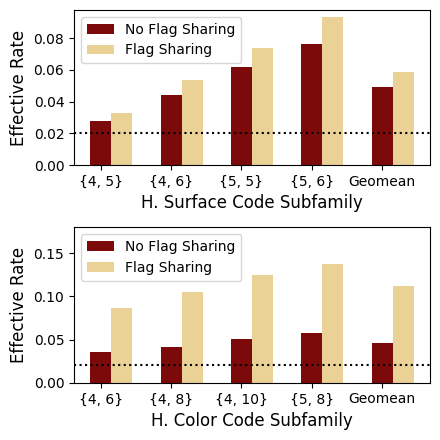

In [227]:
## Effective Rate (FPNs w and w/o flag sharing)
fig, (ax1, ax2) = plt.subplots(2, 1)
fig.set_size_inches(4.5, 4.5)

def get_effective_rate(family, subfamily, v):
    base_folder = f'../../data/protean/{family}/{subfamily}'
    codes = [f for f in os.listdir(base_folder) if os.path.exists(f'{base_folder}/{f}/v4.4/roles.txt')]
    tot_k, tot_N = 0, 0
    for f in codes:
        stats = get_arch_stats(f'{family}/{subfamily}/{f}', v)
        tot_k += get_stats_from_code_name(f)['k']
        tot_N += stats['Qubits']
    return tot_k / tot_N

def add_data_to_ax(ax, family, xlabel):
    ax.axhline(y=1/49, linestyle=':', color='k')
    
    code_names = []
    y1, y2 = [], []
    for sf in subf[family]:
        r, s = [int(x) for x in sf.split('_')]
        code_names.append('{%d, %d}' % (r, s))
        y1.append(get_effective_rate(family, sf, '3.4'))
        y2.append(get_effective_rate(family, sf, '4.4'))
    code_names.append('Geomean')
    y1.append(sp.stats.gmean(y1))
    y2.append(sp.stats.gmean(y2))
    x = np.arange(0, len(code_names))
    ax.bar(x, y1, width=0.3, label='No Flag Sharing', color=c1)
    ax.bar(x+0.3, y2, width=0.3, label='Flag Sharing', color=c3)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel('Effective Rate', fontsize=12)
    ax.set_xticks(x, code_names)
    ax.legend(fontsize=10)

    y2 = np.array(y2)
    scr = 1/49
    print(y2, 1/49)
    print(sp.stats.gmean(y2/scr), y2.max()/scr)
ax2.set_ylim([0, 0.18])
add_data_to_ax(ax1, 'hysc', 'H. Surface Code Subfamily')
add_data_to_ax(ax2, 'hycc', 'H. Color Code Subfamily')
plt.tight_layout()
plt.savefig('plots/eff_rate.pdf', bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../../data/protean/hysc/3_8/48_6_6_3/v3.4/stats.txt'

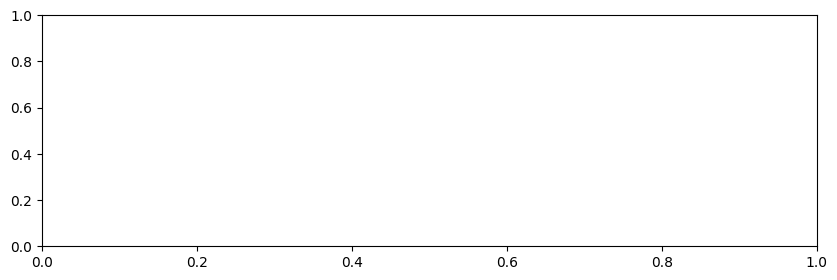

In [177]:
def plot_arch_histogram(output_file):
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 3)

    sc_names = [ format_code_name(code_name(b)) for b in surface_codes ]
    cc_names = [ format_code_name(code_name(b)) for b in color_codes ]
    names = [ *sc_names, *cc_names ]

    code_div_line = len(sc_names)+0.1
    geomean_div_line = len(names)+0.7
    
    x = []
    for i in range(len(sc_names)):
        x.append(i)
    for i in range(len(cc_names)):
        x.append(i+len(sc_names)+0.6)
    x.append(len(names)+1.2)
    x = np.array(x)


    names.append('geomean')
    
    width = 1/6
    multiplier = 0
    # Plot arch statistics.
    labels = [
                'Unopt. FP Network (conn = 4)',
                'Opt. FP Network (conn = 4)',
                'Unopt. FP Network (conn = 3)',
                'Opt. FP Network (conn = 3)'
             ]
    base_rates = []
    colors = [c1, c3, c2, c6, c7]
    gmeans = []
    for (i, v) in enumerate(['3.4', '4.4', '3.3', '4.3']):
        off = width*multiplier
        y = []
        for (j, b) in enumerate(all_codes):
            arch_stats = get_arch_stats(b, v)
            code_stats = get_stats_from_code_name(code_name(b))
            # We care about the rate.
            rate = arch_stats['Qubits'] / code_stats['k']
            if b in color_codes:
                base_rate = (1.5*code_stats['n']-0.5*code_stats['k'])/code_stats['k']
            else:
                base_rate = (2*code_stats['n']-code_stats['k'])/code_stats['k']
            rel_rate = rate / base_rate
            y.append(rel_rate)
        y.append(sp.stats.gmean(y))
        y = np.array(y)
        ax.bar(x + off, y, width, label=labels[i], color=colors[i])
        multiplier += 1
        gmeans.append(y[-1])
        
    ax.set_xlabel('Benchmark [[n, k, $d_z$, $d_x$]]', fontsize=10)
    ax.set_ylabel('Rel. Effective Rate', fontsize=10)
    ax.set_xticks(x + 2*width, names, rotation=15, ha='right', fontsize=8)
    ax.axvline(x=code_div_line, linestyle='--', color='k')
    ax.axvline(x=geomean_div_line, linestyle='--', color='k')
    ax.legend(fontsize=8)

    # realign geomean
    ticks = ax.get_xticklabels()
    ticks[-1].set_rotation(0)
    ticks[-1].set_horizontalalignment('center')
    ticks[-1].set_fontsize(10)

    plt.savefig(f'plots/{output_file}', bbox_inches='tight')
    print(f'{output_file}: geomeans: {gmeans}')

plot_arch_histogram('all_arch_stats.pdf')

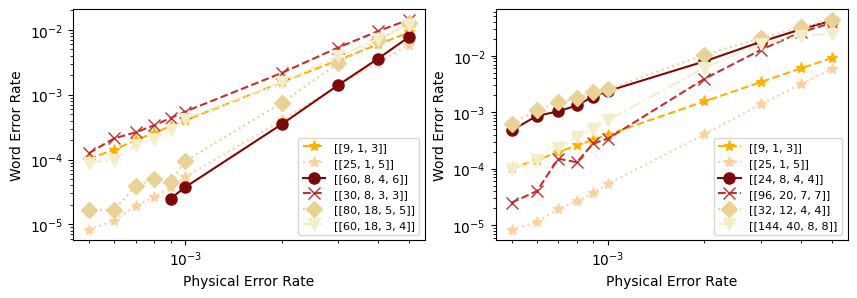

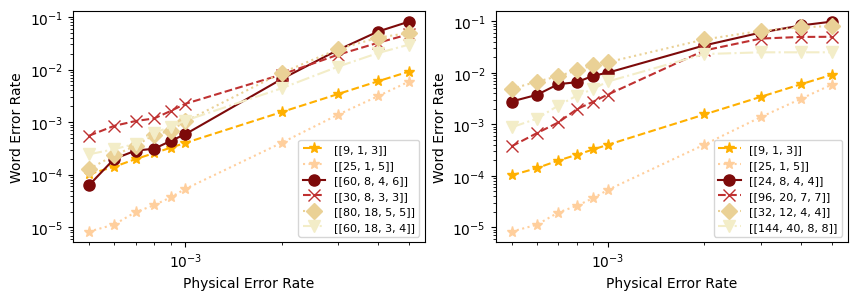

In [141]:
ler_sc = [
    'hysc/4_5/60_8_4_6',
    'hysc/5_5/30_8_3_3',
    'hysc/5_5/80_18_5_5',
    'hysc/5_6/60_18_3_4',
]

ler_cc = [
    'hycc/4_6/24_8_4_4',
    'hycc/4_6/96_20_7_7',
    'hycc/4_8/32_12_4_4',
    'hycc/4_8/144_40_8_8',
]

def plot_codes_on_ax(benchmarks, ax, version):
    linestyles = ['o-', 'x--', 'D:', 'v-.']
    colors = [c1, c2, c3, c4]
    for (i, b) in enumerate(benchmarks):
        k1, k2 = i % len(linestyles), i % len(colors)
        X, Y = get_code_error_rates(b, version)
        ax.plot(X, Y, linestyles[k1], color=colors[k2], ms=8, label=format_code_name(code_name(b)))

def plot_error_rate_wrt_surface_code(output_file, version):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(10, 3)
    # Plot LER for surface code first on both axes.
    rsc_d5_X, rsc_d5_Y = get_rsc_error_rates(3)
    rsc_d7_X, rsc_d7_Y = get_rsc_error_rates(5)

    for ax in (ax1, ax2):
        ax.plot(rsc_d5_X, rsc_d5_Y, '*--', color=c7, ms=8, label='[[9, 1, 3]]')
        ax.plot(rsc_d7_X, rsc_d7_Y, '*:', color=c8, ms=8, label='[[25, 1, 5]]')
    plot_codes_on_ax(ler_sc, ax1, version)
    plot_codes_on_ax(ler_cc, ax2, version)
    for ax in (ax1, ax2):
        ax.set_xlabel('Physical Error Rate', fontsize=10)
        ax.set_ylabel('Word Error Rate', fontsize=10)
        ax.legend(fontsize=8)
        ax.set_xscale('log')
        ax.set_yscale('log')

    plt.savefig(f'plots/{output_file}', bbox_inches='tight')

plot_error_rate_wrt_surface_code('error_rates_conn4.pdf', '3.2')
plot_error_rate_wrt_surface_code('error_rates_conn3.pdf', '4.2')